In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,classification_report


In [12]:
df=pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop\hear\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df=df.dropna()

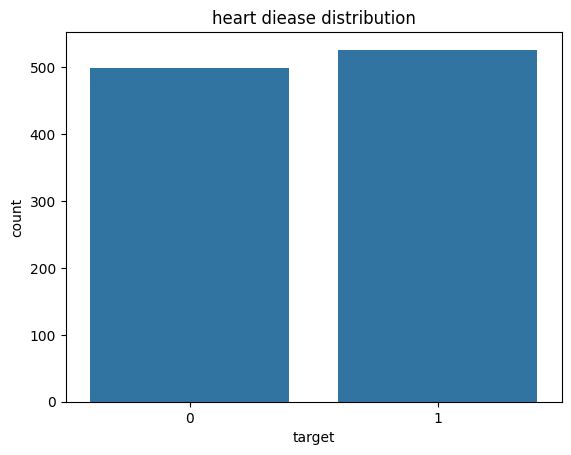

In [16]:
sns.countplot(x='target',data=df)
plt.title("heart diease distribution")
plt.show()

In [18]:
x=df.drop('target',axis=1)
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
log_model=LogisticRegression(max_iter=1000)
log_model.fit(x_train,y_train)
y_pred_log=log_model.predict(x_test)

logistic Regression 0.7951219512195122


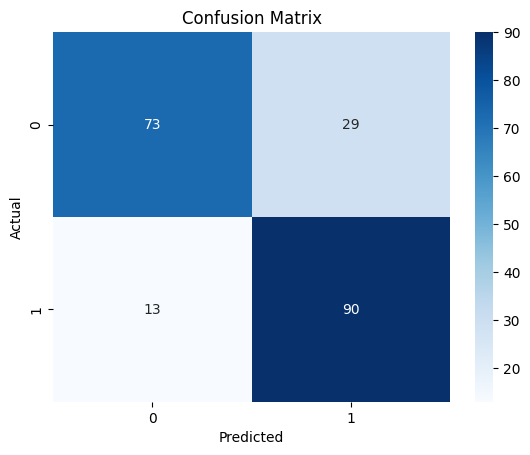

In [23]:
print('logistic Regression',accuracy_score(y_test,y_pred_log))
cm=confusion_matrix(y_test,y_pred_log)
sns.heatmap(cm, annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
y_probs_log=log_model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_log)
roc_auc=roc_auc_score(y_test, y_probs_log)


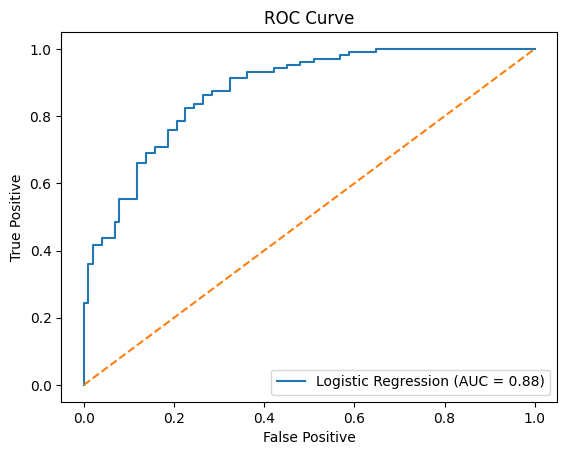

In [26]:
plt.plot(fpr,tpr,label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend()
plt.show()

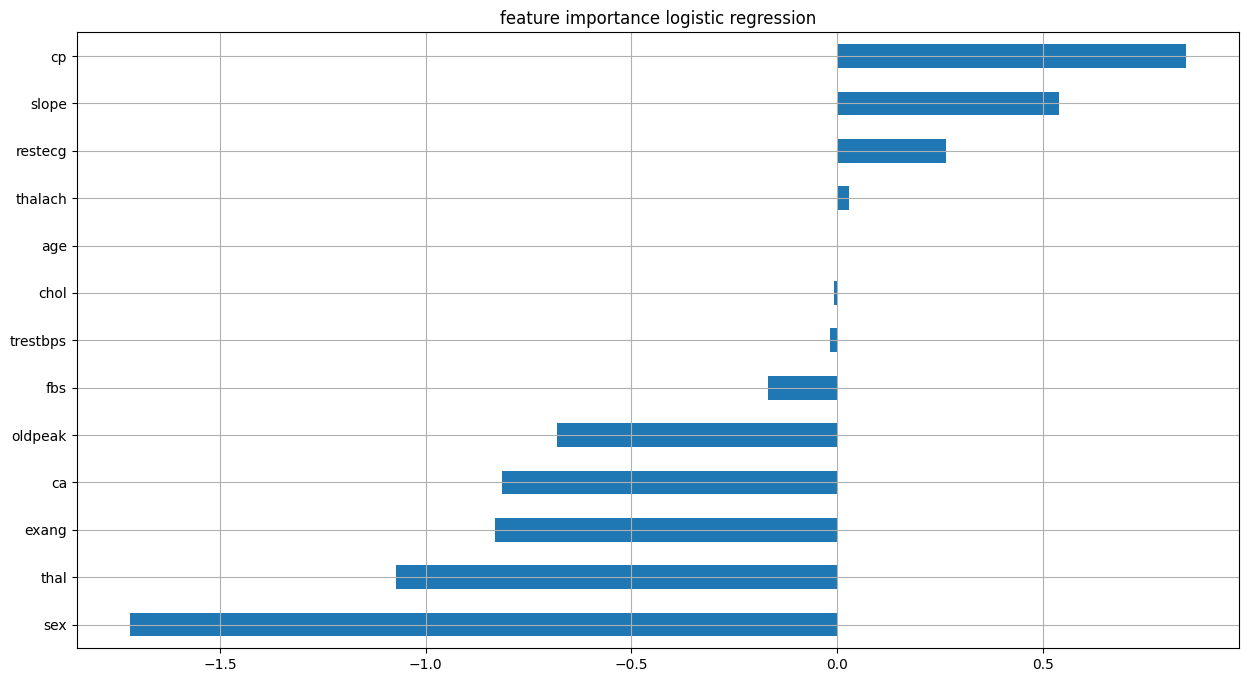

In [29]:
coefficients =pd.Series(log_model.coef_[0],index=x.columns)
coefficients.sort_values().plot(kind='barh',figsize=(15,8),title="feature importance logistic regression")
plt.grid()
plt.show()


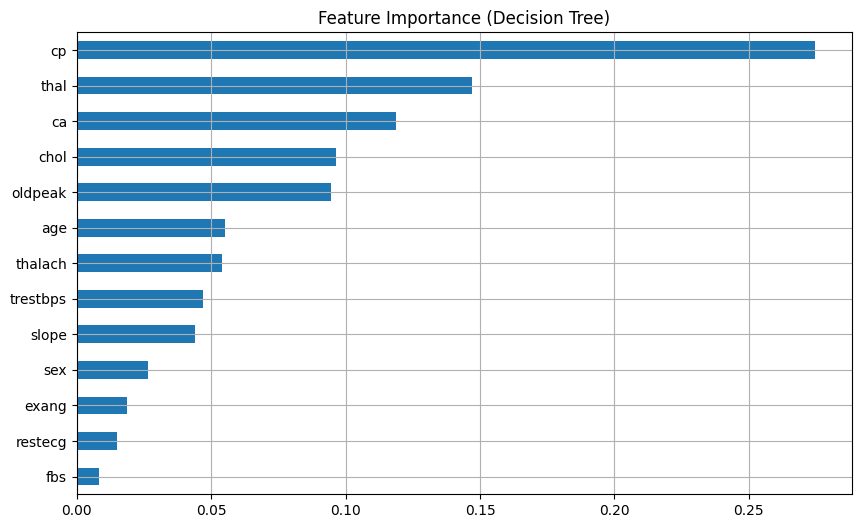

In [35]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train, y_train)
importances= pd.Series(tree_model.feature_importances_, index=x.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6), title='Feature Importance (Decision Tree)')
plt.grid()
plt.show()